In [1]:
import retirement_api as rt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.0 Case

An individual provides a sum of money to PM. Essential Goal is to have 20k for 20 years income starting 10 years from now. Aspirational goal is 50k.

For the sake of case being interesting let's set initial sum of money given by investor in such way that 25k would be achieved by investing in risk-free.

Assume that  inflation is on average 2%.

Hence, the payments of 25k will instead be:

In [2]:
payments_of_25k = rt.generate_equal_consumption_streams(cash_flows_decumulation=-25000, inflation_rate=0.02)
payments_of_25k['inflation_adjusted_CFs']

1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11   -31084.357710
12   -31706.044864
13   -32340.165761
14   -32986.969077
15   -33646.708458
16   -34319.642627
17   -35006.035480
18   -35706.156189
19   -36420.279313
20   -37148.684899
21   -37891.658597
22   -38649.491769
23   -39422.481605
24   -40210.931237
25   -41015.149862
26   -41835.452859
27   -42672.161916
28   -43525.605154
29   -44396.117257
30   -45284.039603
Name: inflation_adjusted_CFs, dtype: float64

In [3]:
payments_of_25k

,pure_CFs,accumulated_inflation,inflation_adjusted_CFs
1,0,1.020000,0.000000
2,0,1.040400,0.000000
3,0,1.061208,0.000000
4,0,1.082432,0.000000
5,0,1.104081,0.000000
6,0,1.126162,0.000000
7,0,1.148686,0.000000
8,0,1.171659,0.000000
9,0,1.195093,0.000000
10,0,1.218994,0.000000


Their PV under condition of risk-free being on average 3% at time 0 is:

In [4]:
# find proper discounting factor
payments_of_25k['discounting_factor'] = (1-0.03)**payments_of_25k.index

# then find their discounted values to find the actual goal
sum_at_inception_25k = np.sum(payments_of_25k['discounting_factor'] * payments_of_25k['inflation_adjusted_CFs']*-1)
sum_at_inception_25k.round(2)

402637.02

Full table would look like this:

In [5]:
#payments_of_25k

This is the sum of money at inception that would allow to achieve the 25k goal with just investment in 3% bonds (assuming interest rates do not move)

Hence, the goal after fiest 10 years is

In [6]:
goal = (sum_at_inception_25k*(1.03**10)).round(2)
goal

541110.49

This is the goal that will provide easy consumtion of 25k. **This is a meaningful starting value**

But actual goals are EG and AG. AG gives consumtion of 50k and EG gives consumption of 20k. Let's find them as the exact numbers to achieve in the next 10 years.

In [7]:
EG = rt.generate_equal_consumption_streams(cash_flows_decumulation=-20000)
EG['discounting_factor'] = (1-0.03)**EG.index
EG_at_inception = np.sum(EG['discounting_factor'] * EG['inflation_adjusted_CFs']*-1)

AG = rt.generate_equal_consumption_streams(cash_flows_decumulation=-50000)
AG['discounting_factor'] = (1-0.03)**AG.index
AG_at_inception = np.sum(AG['discounting_factor'] * AG['inflation_adjusted_CFs']*-1)

We would have need that much money at inception to reach EG by just investing under constant 3% rate:

In [8]:
EG_at_inception.round(0)

322110.0

And that much money for aspirational goal:

In [9]:
AG_at_inception.round(0)

805274.0

hence, the goals after 10 years would be:

In [10]:
(EG_at_inception*1.03**10).round(0),(AG_at_inception*1.03**10).round(0)

(432888.0, 1082221.0)

Note that if at any moment of PV of AG is achieved a rational PM would stop investing in PSP and put all money into risk-free.
At the same time the value of EG can never fall below PV of initial EG sum. Let's construct this situation.

In [11]:
tresholds = pd.DataFrame(index = np.arange(0,11,1))
tresholds['risk_free_return'] = 1.03**(tresholds.index)
tresholds['AG_treshold'] = AG_at_inception * tresholds['risk_free_return']
tresholds['EG_treshold'] = EG_at_inception * tresholds['risk_free_return']
tresholds

,risk_free_return,AG_treshold,EG_treshold
0,1.000000,8.052740e+05,322109.618328
1,1.030000,8.294323e+05,331772.906878
2,1.060900,8.543152e+05,341726.094084
3,1.092727,8.799447e+05,351977.876907
4,1.125509,9.063430e+05,362537.213214
5,1.159274,9.335333e+05,373413.329610
6,1.194052,9.615393e+05,384615.729499
7,1.229874,9.903855e+05,396154.201384
8,1.266770,1.020097e+06,408038.827425
9,1.304773,1.050700e+06,420279.992248


Plotting the trsholds:

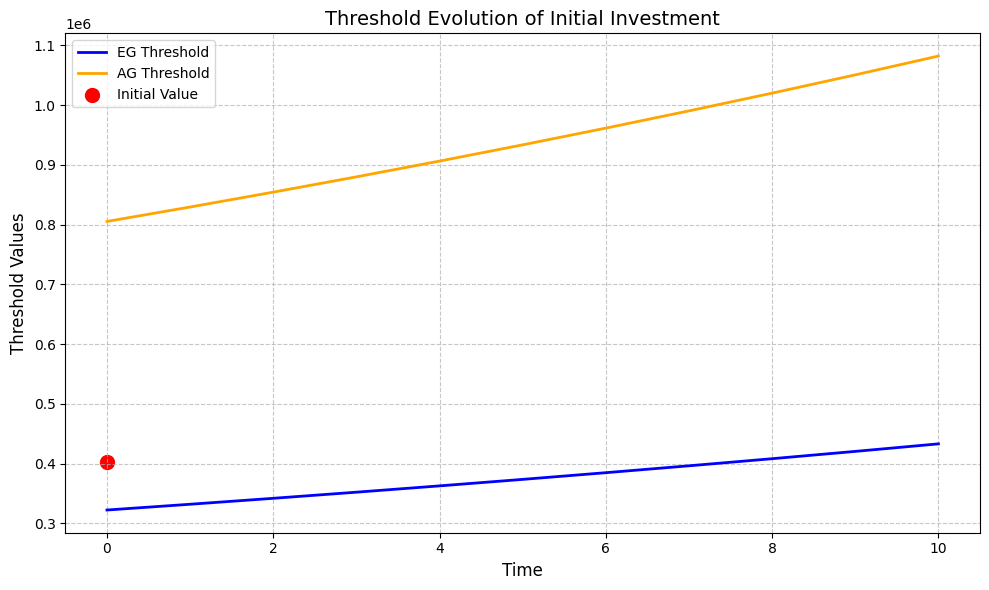

In [12]:
plt.figure(figsize=(10, 6))

# Improved line plots
plt.plot(tresholds.index, tresholds['EG_treshold'], label="EG Threshold", linewidth=2, color='blue')
plt.plot(tresholds.index, tresholds['AG_treshold'], label="AG Threshold", linewidth=2, color='orange')

# Improved scatter plot with better positioning
plt.scatter(0, sum_at_inception_25k.round(2), color='red', s=100, label="Initial Value")

# Labels and title
plt.xlabel("Time", fontsize=12)
plt.ylabel("Threshold Values", fontsize=12)
plt.title("Threshold Evolution of Initial Investment", fontsize=14)

# Adding grid, legend, and better layout
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# 2.0 Market simulation

In [13]:
initial_sum_of_money = sum_at_inception_25k.round(2)

In [14]:
# Parameters
S0 = 1.0              # asset price
T = 10                 # time in years
N = 252*T              # number of time steps in simulation
M = 10000                  # number of simulated paths
seed = 123              # simulation seed

Simulate stock market and intereset rates

In [87]:
S_p, v_p, sr_p, r_p = rt.market_simulation(T, N, M,seed,S0)
time = np.linspace(0, T, N+1)

In [88]:
zc_bond_3y_prices = rt.vasicek_zcb_price(r_p, tau=3)
bond_3y_index = rt.deduce_bond_index(zc_bond_3y_prices, r_p, dt = T/N, initial_investment=1)

## 2.1 Assume all money is invested in stock

/var/folders/th/6shskhh13z16gl5jrtx45zcc0000gn/T/ipykernel_10416/3342520097.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


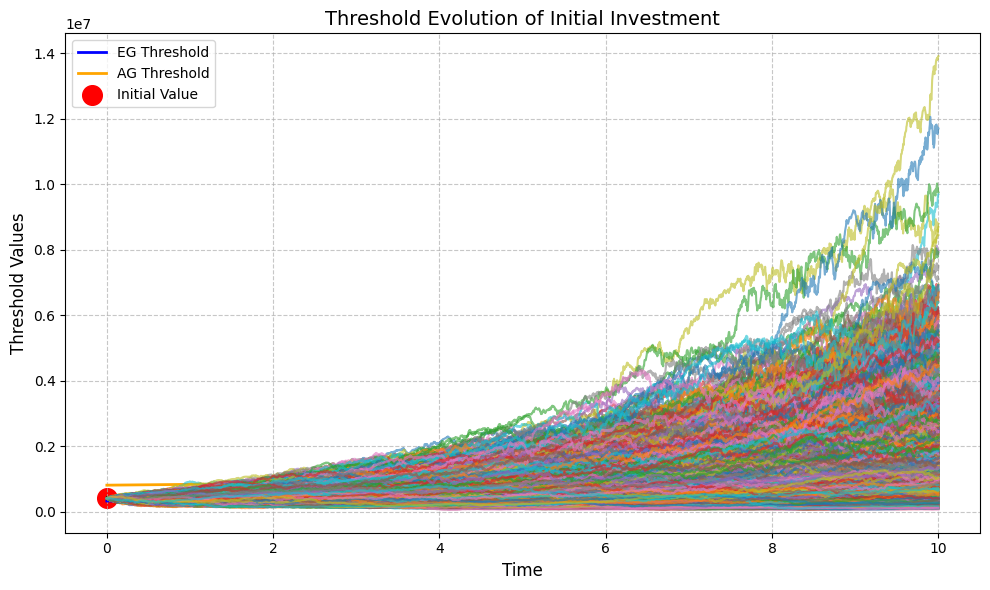

In [89]:
plt.figure(figsize=(10, 6))

# Improved line plots
plt.plot(tresholds.index, tresholds['EG_treshold'], label="EG Threshold", linewidth=2, color='blue')
plt.plot(tresholds.index, tresholds['AG_treshold'], label="AG Threshold", linewidth=2, color='orange')
plt.plot(initial_sum_of_money*S_p, alpha = 0.6)

# Improved scatter plot with better positioning
plt.scatter(0, sum_at_inception_25k.round(2), color='red', s=200, label="Initial Value")

# Labels and title
plt.xlabel("Time", fontsize=12)
plt.ylabel("Threshold Values", fontsize=12)
plt.title("Threshold Evolution of Initial Investment", fontsize=14)

# Adding grid, legend, and better layout
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

Stock already beats the market in any case

But the problem is that the actual EG and AG depend not on 3% plain rate, but on risk-free rate that is also stochastically set

## 2.2 Assume all money is invested in bond index

/var/folders/th/6shskhh13z16gl5jrtx45zcc0000gn/T/ipykernel_10416/3643623221.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


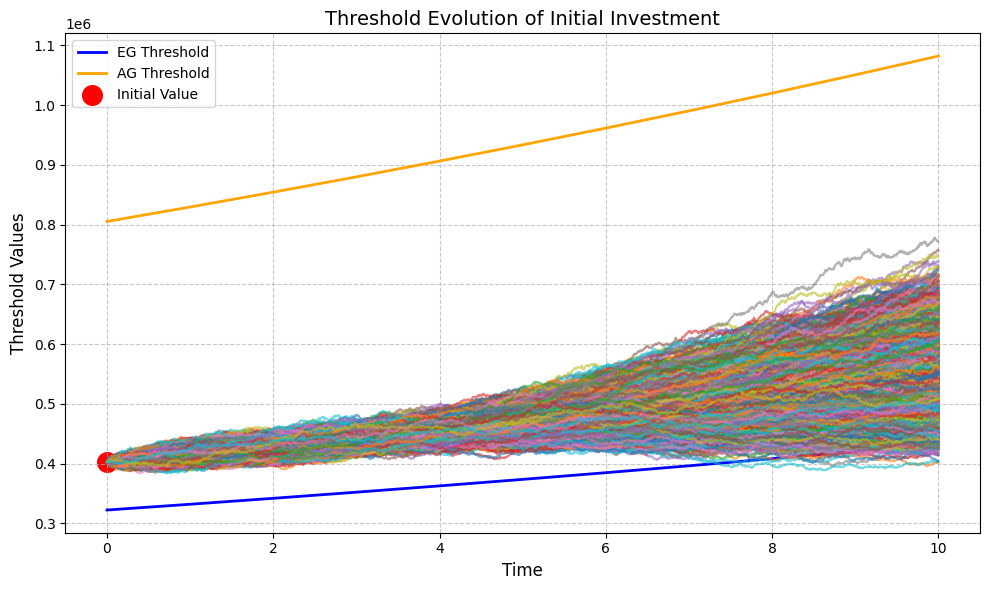

In [90]:
plt.figure(figsize=(10, 6))

# Improved line plots
plt.plot(tresholds.index, tresholds['EG_treshold'], label="EG Threshold", linewidth=2, color='blue')
plt.plot(tresholds.index, tresholds['AG_treshold'], label="AG Threshold", linewidth=2, color='orange')
plt.plot(initial_sum_of_money*bond_3y_index, alpha = 0.6)

# Improved scatter plot with better positioning
plt.scatter(0, sum_at_inception_25k.round(2), color='red', s=200, label="Initial Value")

# Labels and title
plt.xlabel("Time", fontsize=12)
plt.ylabel("Threshold Values", fontsize=12)
plt.title("Threshold Evolution of Initial Investment", fontsize=14)

# Adding grid, legend, and better layout
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

The bond index does not anything on to reach the objective

## 2.3.1 Equal weighted portfolio of stocks and bonds

/var/folders/th/6shskhh13z16gl5jrtx45zcc0000gn/T/ipykernel_10416/3758828535.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


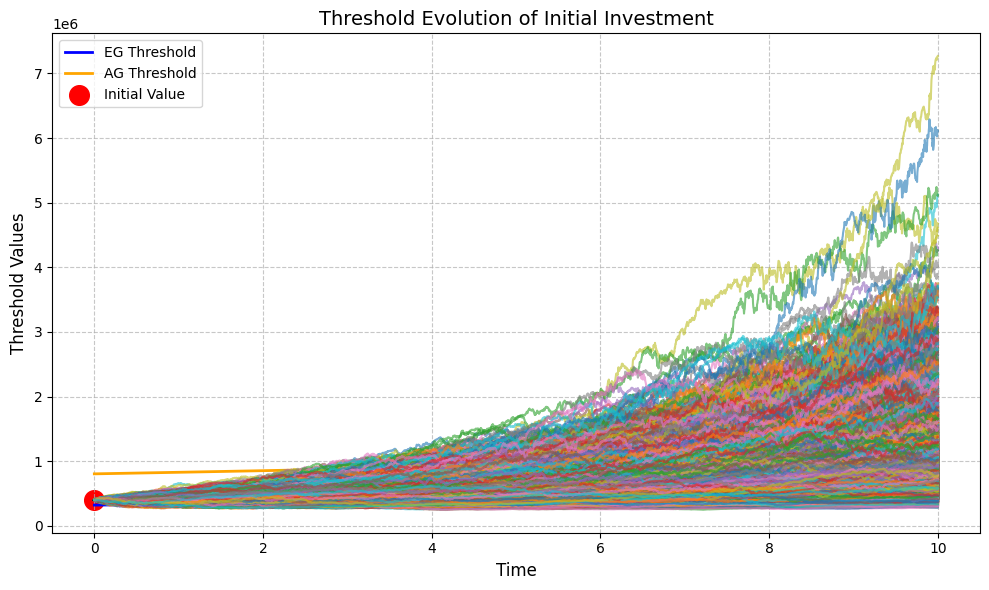

In [91]:
plt.figure(figsize=(10, 6))

# Improved line plots
plt.plot(tresholds.index, tresholds['EG_treshold'], label="EG Threshold", linewidth=2, color='blue')
plt.plot(tresholds.index, tresholds['AG_treshold'], label="AG Threshold", linewidth=2, color='orange')
plt.plot(initial_sum_of_money*(0.5*bond_3y_index+0.5*S_p), alpha = 0.6)

# Improved scatter plot with better positioning
plt.scatter(0, sum_at_inception_25k.round(2), color='red', s=200, label="Initial Value")

# Labels and title
plt.xlabel("Time", fontsize=12)
plt.ylabel("Threshold Values", fontsize=12)
plt.title("Threshold Evolution of Initial Investment", fontsize=14)

# Adding grid, legend, and better layout
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#initial_sum_of_money*(0.5*bond_3y_index+0.5*S_p).loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

,0,1,2,3,4,5,6,7,8,9
0.0,402661.465819,4.026615e+05,402661.465819,402661.465819,402661.465819,4.026615e+05,4.026615e+05,402661.465819,402661.465819,402661.465819
1.0,418927.276036,4.416242e+05,424220.750253,469995.040329,356285.003592,4.147806e+05,4.191606e+05,448172.602165,393060.452008,415123.352986
2.0,460203.103323,4.754565e+05,435514.978726,396928.837348,399501.145849,4.165199e+05,4.581216e+05,452602.206508,359928.710671,464336.395476
3.0,533175.321088,4.791780e+05,577311.911090,402578.434477,429416.846065,4.570545e+05,5.298560e+05,457770.339298,439499.910834,504985.056345
4.0,462105.633206,4.996436e+05,490879.391690,422974.886691,513050.947907,5.379470e+05,5.563884e+05,475048.106866,518992.690187,492690.676207
5.0,524077.196412,5.339819e+05,572243.047541,448974.678791,551412.006447,6.490664e+05,5.923795e+05,473612.858248,556743.431619,608219.540093
6.0,689253.179490,6.148313e+05,517399.198992,484832.213286,543848.773911,6.655195e+05,6.320938e+05,527503.058143,690213.659098,586815.582910
7.0,518549.490504,6.495907e+05,525490.894953,573023.519248,565530.378238,6.649754e+05,6.718185e+05,624030.628912,770736.987000,601735.238496
8.0,598812.278119,7.861300e+05,541587.190988,586384.631873,523455.517188,7.604744e+05,7.725110e+05,554971.668033,855805.237584,749472.331634
9.0,668305.338978,1.032661e+06,579903.798216,543019.126218,437761.267028,9.842601e+05,9.001738e+05,584846.510824,887794.793250,744228.632706


In [ ]:
#initial_sum_of_money*(0.5*bond_3y_index+0.5*S_p).loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].sub(tresholds['AG_treshold'], axis=0)

,0,1,2,3,4,5,6,7,8,9
0.0,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11,-3.242327e+11
1.0,-3.339597e+11,-3.339597e+11,-3.339597e+11,-3.339597e+11,-3.339598e+11,-3.339597e+11,-3.339597e+11,-3.339597e+11,-3.339597e+11,-3.339597e+11
2.0,-3.439785e+11,-3.439785e+11,-3.439785e+11,-3.439785e+11,-3.439785e+11,-3.439785e+11,-3.439785e+11,-3.439785e+11,-3.439786e+11,-3.439785e+11
3.0,-3.542978e+11,-3.542978e+11,-3.542977e+11,-3.542979e+11,-3.542979e+11,-3.542979e+11,-3.542978e+11,-3.542979e+11,-3.542979e+11,-3.542978e+11
4.0,-3.649268e+11,-3.649268e+11,-3.649268e+11,-3.649268e+11,-3.649267e+11,-3.649267e+11,-3.649267e+11,-3.649268e+11,-3.649267e+11,-3.649268e+11
5.0,-3.758746e+11,-3.758745e+11,-3.758745e+11,-3.758746e+11,-3.758745e+11,-3.758744e+11,-3.758745e+11,-3.758746e+11,-3.758745e+11,-3.758745e+11
6.0,-3.871506e+11,-3.871507e+11,-3.871508e+11,-3.871508e+11,-3.871508e+11,-3.871507e+11,-3.871507e+11,-3.871508e+11,-3.871506e+11,-3.871507e+11
7.0,-3.987653e+11,-3.987652e+11,-3.987653e+11,-3.987653e+11,-3.987653e+11,-3.987652e+11,-3.987652e+11,-3.987652e+11,-3.987651e+11,-3.987653e+11
8.0,-4.107282e+11,-4.107281e+11,-4.107283e+11,-4.107283e+11,-4.107283e+11,-4.107281e+11,-4.107281e+11,-4.107283e+11,-4.107280e+11,-4.107281e+11
9.0,-4.230500e+11,-4.230497e+11,-4.230501e+11,-4.230502e+11,-4.230503e+11,-4.230497e+11,-4.230498e+11,-4.230501e+11,-4.230498e+11,-4.230500e+11


The strategy became better. It does not breach the floor while achieving the ceiling

# 2.3.2 Success simulation of  portfolio of x in bond and (1-x) in stock

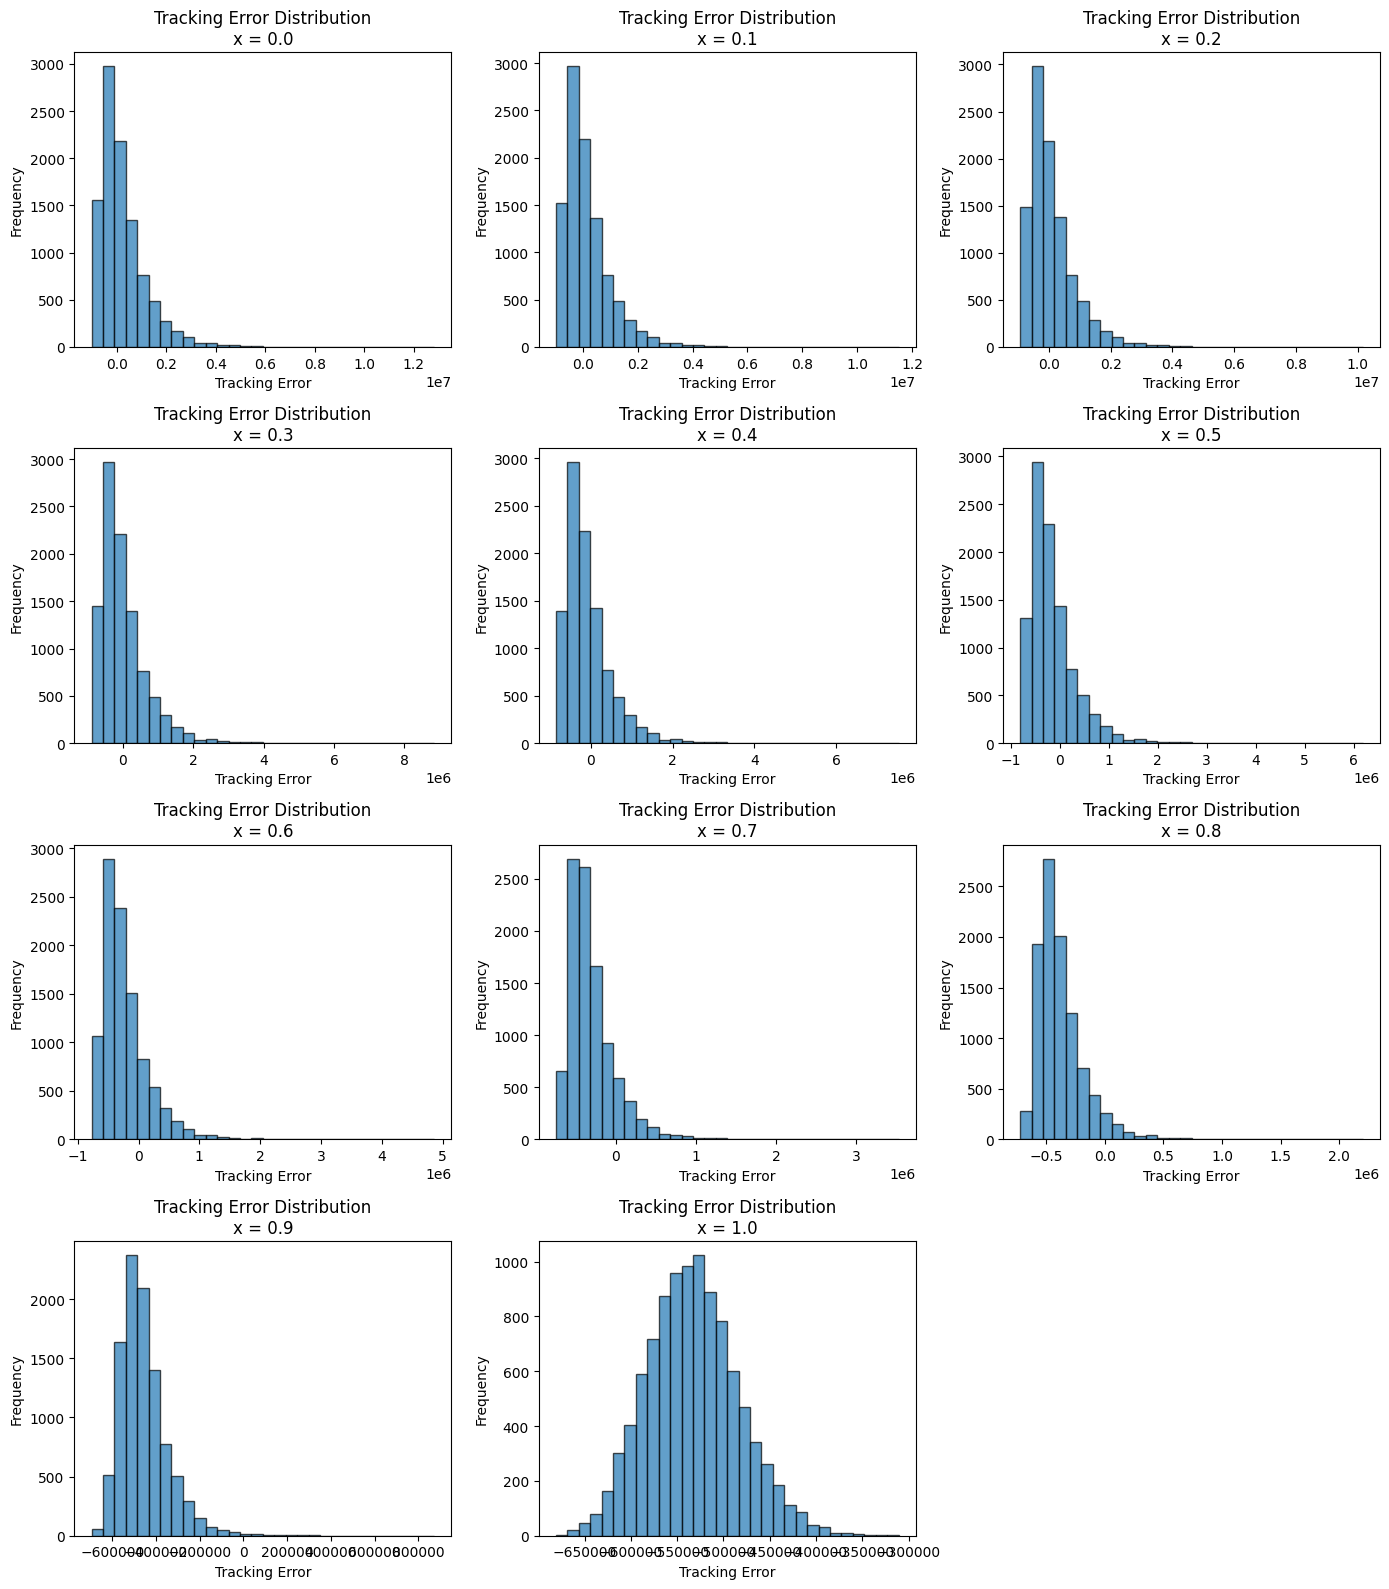

                0.0           0.1           0.2           0.3           0.4  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean   2.353926e+05  1.585462e+05  8.169972e+04  4.853265e+03 -7.199319e+04   
std    9.639673e+05  8.682318e+05  7.725309e+05  6.768794e+05  5.813014e+05   
min   -1.023401e+06 -9.795171e+05 -9.356336e+05 -8.917500e+05 -8.478664e+05   
25%   -4.189729e+05 -4.316505e+05 -4.438257e+05 -4.557690e+05 -4.676160e+05   
50%   -1.872064e+04 -7.103525e+04 -1.221975e+05 -1.736691e+05 -2.231934e+05   
75%    6.054491e+05  4.916765e+05  3.792719e+05  2.655079e+05  1.510857e+05   
max    1.283173e+07  1.150285e+07  1.017396e+07  8.845081e+06  7.516198e+06   

                0.5           0.6           0.7           0.8            0.9  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   10000.000000   
mean  -1.488396e+05 -2.256861e+05 -3.025325e+05 -3.793790e+05 -456225.451545   
std    4.858406e+05  3.905827e+05  2.957239e+05 

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppose x_values is your array of portfolio weights
# e.g., x_values = np.arange(0, 1.1, 0.1)  # 0,0.1,0.2,...,1.0
x_values = np.arange(0, 1.1, 0.1)

# We'll store each scenario's tracking error in a DataFrame,
# with columns = different x, rows = scenario index
df_tracking_errors = pd.DataFrame()

for x in x_values:
    # 1) Calculate portfolio returns for all scenarios/time steps
    portfolio_returns = x * bond_3y_index + (1 - x) * S_p
    
    # 2) Focus on the last row (index=10) for each scenario
    #    This should be a Series (one entry per scenario) if your data is shaped that way
    last_cashflow = portfolio_returns.loc[10]  # Series of shape (#scenarios,)

    # 3) Subtract the threshold (also a single value or a Series aligned by scenario)
    #    If 'AG_treshold'[10] is a single scalar, it will broadcast across scenarios
    tracking_error = initial_sum_of_money * last_cashflow - tresholds['AG_treshold'][10]
    
    # 4) Store in the DataFrame; column labeled by x
    df_tracking_errors[x] = tracking_error

# Now df_tracking_errors has columns = each x, rows = scenario index

# --- Plot a histogram for each x in a multi‐subplot figure ---
ncols = 3
nrows = int(np.ceil(len(x_values) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows), sharex=False, sharey=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, x in enumerate(x_values):
    ax = axes[i]
    ax.hist(df_tracking_errors[x], bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f"Tracking Error Distribution\nx = {x:.1f}")
    ax.set_xlabel("Tracking Error")
    ax.set_ylabel("Frequency")

# Hide any unused subplots if x_values is fewer than ncols*nrows
for j in range(i+1, nrows*ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- Print summary statistics for each x ---
summary_stats = df_tracking_errors.describe()
print(summary_stats)


In [34]:
df = pd.read_excel('case_study_data.xlsx', sheet_name=1)

In [35]:
df.columns = df.iloc[0]
df.columns
index = df['Maturity (years)'][2:]
index.name = 'Date'
df = df[2:]
df.index = index
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


,Maturity (years),0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-31,2014-10-31 00:00:00,0.001525,0.001525,0.005385,0.009872,0.013707,0.016728,0.019069,0.020903,0.022370,...,0.030328,0.030618,0.030887,0.031137,0.031370,0.031587,0.031791,0.031981,0.032160,0.032327
2014-11-03,2014-11-03 00:00:00,0.001631,0.001631,0.005533,0.010066,0.013901,0.016893,0.019199,0.020998,0.022437,...,0.030274,0.030560,0.030825,0.031071,0.031299,0.031513,0.031712,0.031899,0.032074,0.032238
2014-11-04,2014-11-04 00:00:00,0.001439,0.001439,0.005512,0.010062,0.013873,0.016836,0.019115,0.020892,0.022312,...,0.030027,0.030307,0.030566,0.030807,0.031032,0.031241,0.031436,0.031619,0.031790,0.031951
2014-11-05,2014-11-05 00:00:00,0.001556,0.001556,0.005611,0.010135,0.013922,0.016873,0.019152,0.020938,0.022374,...,0.030160,0.030433,0.030685,0.030918,0.031135,0.031335,0.031523,0.031697,0.031860,0.032013
2014-11-06,2014-11-06 00:00:00,0.001682,0.001682,0.005814,0.010413,0.014241,0.017211,0.019498,0.021290,0.022729,...,0.030549,0.030822,0.031074,0.031307,0.031523,0.031723,0.031910,0.032084,0.032246,0.032398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,2024-10-28 00:00:00,0.042701,0.042701,0.040979,0.040501,0.040558,0.040855,0.041258,0.041703,0.042157,...,0.046125,0.046271,0.046398,0.046509,0.046604,0.046683,0.046749,0.046801,0.046841,0.046870
2024-10-29,2024-10-29 00:00:00,0.042583,0.042583,0.040861,0.040406,0.040491,0.040813,0.041238,0.041702,0.042171,...,0.046145,0.046283,0.046402,0.046503,0.046588,0.046658,0.046713,0.046755,0.046785,0.046803
2024-10-30,2024-10-30 00:00:00,0.042760,0.042760,0.041321,0.040869,0.040888,0.041134,0.041487,0.041885,0.042296,...,0.045830,0.045949,0.046051,0.046138,0.046209,0.046267,0.046311,0.046343,0.046364,0.046374


In [37]:
df.columns[4]

3.0

In [ ]:
df_bond = df[[df.columns[4]]]


0
3.0    5.555000e+21
Name: 2024-11-01 00:00:00, dtype: float64

In [85]:
df_bond

,3.0
Date,
2014-10-31,0.009872
2014-11-03,0.010066
2014-11-04,0.010062
2014-11-05,0.010135
2014-11-06,0.010413
...,...
2024-10-28,0.040501
2024-10-29,0.040406
2024-10-30,0.040869


In [95]:
bond_index = daily_bond_price_return[1:].index
bond_dividend = df_bond[:-1]/256
bond_dividend.index = bond_index

In [100]:
bond_dividend

,3.0
Date,
2014-11-03,0.000039
2014-11-04,0.000039
2014-11-05,0.000039
2014-11-06,0.000040
2014-11-07,0.000041
...,...
2024-10-28,0.000157
2024-10-29,0.000158
2024-10-30,0.000158


In [101]:
daily_bond_price = (1 + df_bond / 256) ** (-3 * 256)
daily_bond_price_return = daily_bond_price.pct_change().fillna(0)
bond_return = (daily_bond_price_return + bond_dividend).fillna(0)
bond_return

,3.0
Date,
2014-10-31,0.000000
2014-11-03,-0.000543
2014-11-04,0.000051
2014-11-05,-0.000180
2014-11-06,-0.000794
...,...
2024-10-28,-0.000886
2024-10-29,0.000443
2024-10-30,-0.001230


In [102]:
cumulative_bond_return = (bond_return+1).cumprod().iloc[-1]
cumulative_bond_return

0
3.0    1.10905
Name: 2024-11-01 00:00:00, dtype: float64

DatetimeIndex(['2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06',
               '2014-11-07', '2014-11-10', '2014-11-11', '2014-11-12',
               '2014-11-13', '2014-11-14',
               ...
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30',
               '2024-10-31', '2024-11-01'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [76]:
df_stock = pd.read_excel('case_study_data.xlsx', sheet_name=0)

In [77]:
df_stock

,Prices,Unnamed: 1
0,Date,S&P500
1,2014-10-31 00:00:00,3679.99
2,2014-11-03 00:00:00,3679.58
3,2014-11-04 00:00:00,3669.18
4,2014-11-05 00:00:00,3691.38
...,...,...
2514,2024-10-28 00:00:00,12751.22
2515,2024-10-29 00:00:00,12771.8
2516,2024-10-30 00:00:00,12729.73
2517,2024-10-31 00:00:00,12493.74


In [78]:
df_stock.columns = df_stock.iloc[0]

In [79]:

index = df_stock['Date'][1:]
index.name = 'Date'
df_stock = df_stock[1:]
df_stock.index = index
df_stock

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


,Date,S&P500
Date,,
2014-10-31,2014-10-31 00:00:00,3679.99
2014-11-03,2014-11-03 00:00:00,3679.58
2014-11-04,2014-11-04 00:00:00,3669.18
2014-11-05,2014-11-05 00:00:00,3691.38
2014-11-06,2014-11-06 00:00:00,3706.45
...,...,...
2024-10-28,2024-10-28 00:00:00,12751.22
2024-10-29,2024-10-29 00:00:00,12771.8
2024-10-30,2024-10-30 00:00:00,12729.73


In [80]:
df_stock = df_stock[[df_stock.columns[1]]]
df_stock_return = df_stock.pct_change().fillna(0)
cumulative_stock_return = (df_stock_return+1).cumprod().iloc[-1]
cumulative_stock_return

/var/folders/th/6shskhh13z16gl5jrtx45zcc0000gn/T/ipykernel_11267/78695685.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stock_return = df_stock.pct_change().fillna(0)


0
S&P500    3.409085
Name: 2024-11-01 00:00:00, dtype: float64

In [119]:
cumulative_bond_return.iloc[0]

1.1090497226953808

In [131]:
x_values = np.arange(0, 1.1, 0.1)
df_real_tracking_errors = pd.DataFrame()

for x in x_values:
    # 1) Calculate portfolio returns for all scenarios/time steps
    portfolio_returns = x * cumulative_bond_return.iloc[0] + (1 - x) * cumulative_stock_return.iloc[0]

    # 3) Subtract the threshold (broadcasts across scenarios if necessary)
    tracking_error = initial_sum_of_money * portfolio_returns - tresholds['AG_treshold'][10]
    
    # 4) Store in the DataFrame; row by row or as a column
    df_real_tracking_errors.loc[0, x] = tracking_error  # Store scalar


In [132]:
df_real_tracking_errors

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,290402.986523,197795.037405,105187.088287,12579.139168,-80028.80995,-172636.759068,-265244.708187,-357852.657305,-450460.606424,-543068.555542,-635676.50466
